In [4]:
import pandas as pd
from IPython.display import display

train_df = pd.read_csv("train.csv")
# print(train_df.info())
display(train_df.describe())
display(train_df["label"].value_counts().to_frame())


,fitzpatrick_scale,fitzpatrick_centaur,ddi_scale
count,2860.000000,2860.000000,2860.000000
mean,2.524476,2.095455,23.547552
std,1.474428,1.510942,15.530522
min,-1.000000,-1.000000,-1.000000
25%,2.000000,1.000000,12.000000
50%,2.000000,2.000000,12.000000
75%,3.000000,3.000000,34.000000
max,6.000000,6.000000,56.000000


,count
label,
squamous-cell-carcinoma,407
basal-cell-carcinoma,328
folliculitis,239
acne-vulgaris,234
melanoma,181
eczema,143
acne,128
mycosis-fungoides,127
actinic-keratosis,122


In [3]:
print(train_df.isnull().sum())  # count missing values per column

md5hash                     0
fitzpatrick_scale           0
fitzpatrick_centaur         0
label                       0
nine_partition_label        0
three_partition_label       0
qc                       2770
ddi_scale                   0
dtype: int64


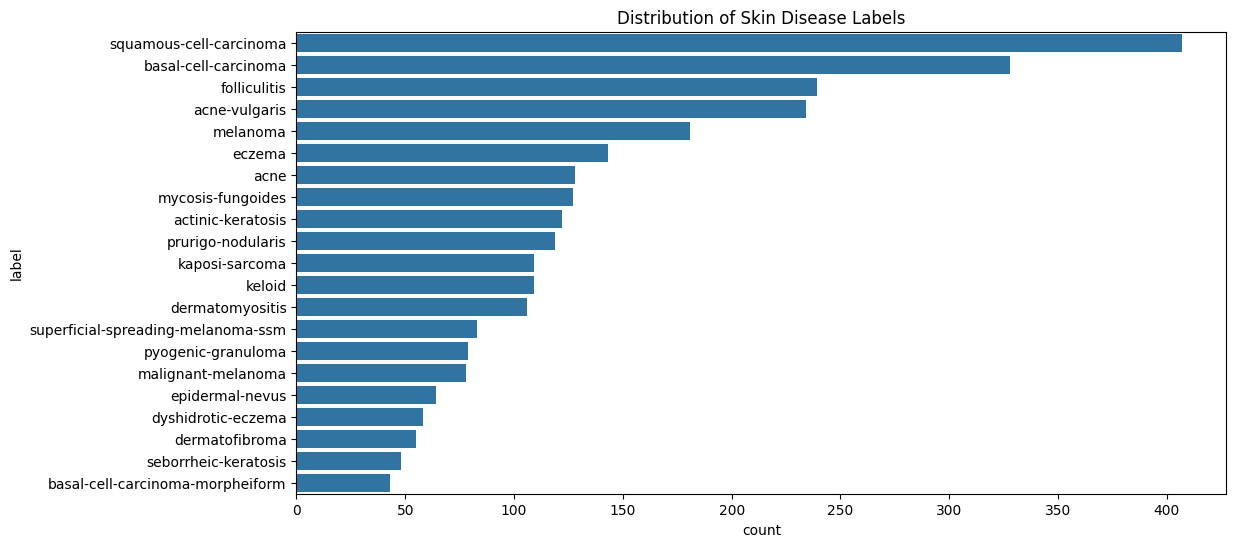

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.countplot(y=train_df["label"], order=train_df["label"].value_counts().index)
plt.title("Distribution of Skin Disease Labels")
plt.show()

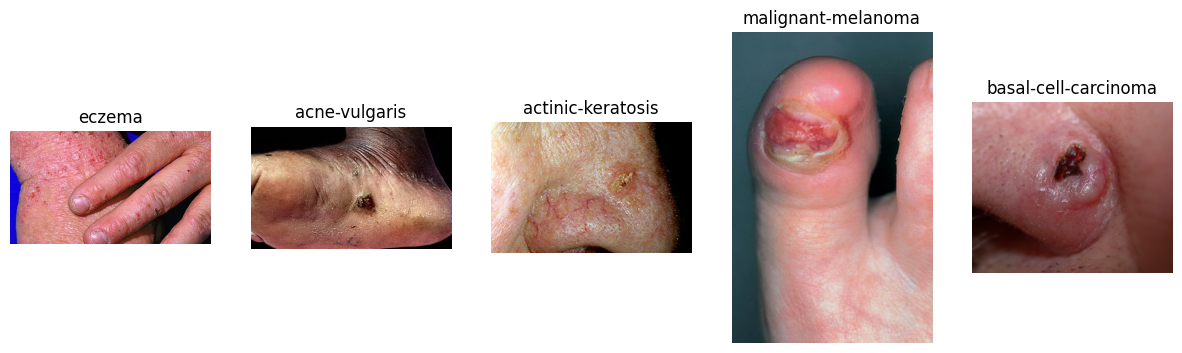

In [9]:
from PIL import Image
import matplotlib.pyplot as plt
import os

image_dir = "train/train"

def display_sample_images(df, image_dir, num_samples=5):
    sample = df.sample(num_samples)
    fig, axes = plt.subplots(1, num_samples, figsize=(15, 5))

    for ax, (_, row) in zip(axes, sample.iterrows()):
        # build the image path
        label_folder = row["label"]  # navigate into the label subfolder
        img_path = os.path.join(image_dir, label_folder, row["md5hash"] + ".jpg")
        
        # check if the image exists and display it
        if os.path.exists(img_path):
            img = Image.open(img_path)
            ax.imshow(img)
            ax.set_title(label_folder)
        else:
            ax.set_title("Missing Image")
        ax.axis("off")
    
    plt.show()

display_sample_images(train_df, image_dir)

In [17]:
import os
from collections import Counter

image_dir = "train/train"
shapes = []

for _, row in train_df.iterrows():
    label_folder = row["label"] 
    img_path = os.path.join(image_dir, label_folder, row["md5hash"] + ".jpg")
    
    # print(f"Checking: {img_path}")
    
    if os.path.exists(img_path):
        try:
            img = Image.open(img_path)
            shapes.append(img.size)
        except Exception as e:
            print(f"Error opening image {img_path}: {e}")
    else:
        print(f"Image not found: {img_path}")

# analyze the shapes of the images
shape_distribution = Counter(shapes)
print(f"Shapes collected: {shapes}")
print(f"Shape Distribution: {shape_distribution}")


Shapes collected: [(438, 341), (495, 236), (402, 359), (488, 362), (979, 783), (505, 711), (340, 327), (350, 369), (293, 192), (468, 824), (478, 474), (808, 401), (466, 395), (442, 401), (664, 355), (493, 473), (402, 439), (400, 400), (450, 340), (497, 274), (416, 267), (293, 192), (589, 456), (455, 339), (454, 422), (368, 233), (392, 431), (448, 362), (439, 322), (356, 407), (618, 931), (288, 192), (640, 480), (485, 364), (127, 192), (418, 265), (472, 336), (415, 267), (558, 355), (316, 234), (358, 399), (301, 192), (424, 607), (468, 327), (545, 463), (326, 483), (2178, 920), (476, 371), (419, 272), (480, 640), (600, 400), (326, 483), (358, 458), (400, 400), (479, 369), (552, 334), (290, 192), (461, 250), (400, 400), (346, 440), (600, 400), (400, 400), (351, 524), (452, 391), (380, 448), (485, 364), (394, 289), (422, 311), (500, 330), (492, 337), (620, 455), (603, 343), (1024, 768), (1606, 1158), (450, 356), (500, 363), (334, 441), (1024, 768), (453, 391), (480, 685), (393, 255), (425

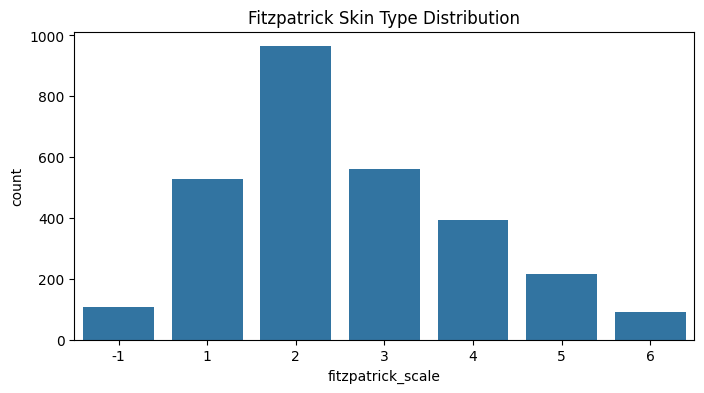

In [11]:
'''
The Fitzpatrick scale is a numerical classification system for human skin tone 
based on its reaction to ultraviolet (UV) radiation. It is widely used in dermatology 
to assess skin types, particularly for predicting the skin's response to sun exposure 
and potential risk of sunburn or skin cancer. The scale ranges from Type I to Type VI.

Type I: Very fair skin, always burns, never tans (e.g., red or blonde hair, blue or green eyes).
Type II: Fair skin, usually burns, tans minimally.
Type III: Medium skin, sometimes burns, gradually tans to light brown.
Type IV: Olive or darker skin, rarely burns, tans easily to moderate brown.
Type V: Brown skin, very rarely burns, tans very easily to dark brown.
Type VI: Dark brown or black skin, never burns, deeply pigmented.
'''
plt.figure(figsize=(8, 4))
sns.countplot(x=train_df["fitzpatrick_scale"])
plt.title("Fitzpatrick Skin Type Distribution")
plt.show()